In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Online_Course_final1_updated.csv**

In [ ]:
import pandas as pd
import networkx as nx
try:
    data_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/user_course_ratings_final1_updated.csv')
except pd.errors.ParserError:
    data_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Online_courses_final1_updated.csv', error_bad_lines=False)

print(data_raw.columns)
data = data_raw


Index(['user_id', 'course_id', 'rating', 'language', 'preferred_instructor'], dtype='object')


# Preprocess Online Courses dataset to categories

In [ ]:
import pandas as pd

# Load the datasets
courses_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Online_courses_final1_updated.csv')
user_courses_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/user_course_ratings_final1_updated.csv')

# Inspect the data to ensure consistent column names
print(courses_df.columns)
print(user_courses_df.columns)

# Standardize column names for merging
courses_df = courses_df.rename(columns={'CourseID': 'course_id'})

categories_to_remove = [
    "Math and Logic", "计算机科学", "Ciencia de Datos", "Negocios",
    "Ciencias de la Computación", "Negócios", "データサイエンス", "Tecnologia da informação",
    "Cloud Computing", "Autonomous Systems", "Product Management"
]

# Filter out rows in courses_df with categories to remove
filtered_courses_df = courses_df[~courses_df['Category'].isin(categories_to_remove)]

# Get course_ids of removed categories
course_ids_to_remove = courses_df[courses_df['Category'].isin(categories_to_remove)]['course_id'].unique()

# Filter user_ratings_df to remove rows with those course_ids
filtered_user_ratings_df = user_courses_df[~user_courses_df['course_id'].isin(course_ids_to_remove)]
# Perform the merge
print("Filtered courses dataset shape:", filtered_courses_df.shape)
print("Filtered user_course_ratings dataset shape:", filtered_user_ratings_df.shape)


Index(['CourseID', 'Title', 'URL', 'Short_Intro', 'Category', 'Sub-Category',
       'Course_Type', 'Language', 'Subtitle Languages', 'Skills',
       'Instructors', 'Rating', 'Number of viewers', 'Duration', 'Site',
       'user_ratings'],
      dtype='object')
Index(['user_id', 'course_id', 'rating', 'language', 'preferred_instructor'], dtype='object')
Filtered courses dataset shape: (4935, 16)
Filtered user_course_ratings dataset shape: (9355, 5)


In [ ]:
# Save the filtered courses dataset to a CSV file
filtered_courses_df.to_csv('/content/drive/MyDrive/Colab Notebooks/filtered_courses.csv', index=False)

# Save the filtered user ratings dataset to a CSV file
filtered_user_ratings_df.to_csv('/content/drive/MyDrive/Colab Notebooks/filtered_user_courses.csv', index=False)
from google.colab import files

# Download the filtered courses dataset
files.download('/content/drive/MyDrive/Colab Notebooks/filtered_courses.csv')

# Download the filtered user ratings dataset
files.download('/content/drive/MyDrive/Colab Notebooks/filtered_user_courses.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Merge user & course dataset

In [ ]:
user_courses_df = filtered_user_ratings_df
courses_df = filtered_courses_df

merged_df = pd.merge(user_courses_df, courses_df, on='course_id', how='inner')

# Display the merged dataframe
print(merged_df.head())

   user_id course_id  rating language  preferred_instructor  \
0        0     C4781       3  English                     0   
1        0     C3923       2  English                     0   
2        0     C4437       2  English                     0   
3        0     C1806       2  English                     0   
4        0      C158       3  English                     0   

                                               Title  \
0    Instructional Design and Technology for Society   
1  Programming Essentials with Python: Cloud Tech...   
2  Workplace Wellbeing: How to Build Confidence a...   
3  An Introduction to Interactive Programming in ...   
4            PostgreSQL for Everybody Specialization   

                                                 URL  \
0  https://www.futurelearn.com/courses/instructio...   
1  https://www.futurelearn.com/courses/programmin...   
2  https://www.futurelearn.com/courses/surviving-...   
3  https://www.coursera.org/learn/interactive-pyt...   
4  h

In [ ]:
category_counts = merged_df['Category'].value_counts()

# Display the counts for each category
print(category_counts)

Category
Business                            1571
Data Science                        1146
Language Learning                    932
Computer Science                     824
Science                              770
Artificial Intelligence              657
Health                               622
Information Technology               518
Design                               473
Personal Development                 368
Arts and Humanities                  366
Programming & Development            355
Physical Science and Engineering     293
Social Sciences                      257
Cybersecurity                        203
Name: count, dtype: int64


In [ ]:
# Dropping specified columns from merged_df
merged_df = merged_df.drop(columns=['Rating', 'Duration', 'Number of viewers', 'Subtitle Languages', 'URL', 'user_ratings'])

# Display the resulting dataframe
print(merged_df.head())


   user_id course_id  rating language  preferred_instructor  \
0        0     C4781       3  English                     0   
1        0     C3923       2  English                     0   
2        0     C4437       2  English                     0   
3        0     C1806       2  English                     0   
4        0      C158       3  English                     0   

                                               Title  \
0    Instructional Design and Technology for Society   
1  Programming Essentials with Python: Cloud Tech...   
2  Workplace Wellbeing: How to Build Confidence a...   
3  An Introduction to Interactive Programming in ...   
4            PostgreSQL for Everybody Specialization   

                                         Short_Intro                 Category  \
0  Master the basics of instructional design and ...        Language Learning   
1  Launch your career in programming with this co...  Artificial Intelligence   
2  Discover workplace wellbeing through s

In [ ]:
merged_df.columns
print(data)
data = merged_df.sample(frac=0.1, random_state=42)  # frac=0.1 means 10% sample, random_state ensures reproducibility
print(data)

      user_id course_id  rating language  preferred_instructor
0           0     C4781       3  English                     0
1           0     C3923       2  English                     0
2           0     C4437       2  English                     0
3           0     C1806       2  English                     0
4           0      C158       3  English                     0
...       ...       ...     ...      ...                   ...
9995      999     C4250       5  English                     1
9996      999     C4259       5  English                     1
9997      999     C4191       5  English                     1
9998      999     C4632       5  English                     1
9999      999     C4233       5  English                     1

[10000 rows x 5 columns]
      user_id course_id  rating language  preferred_instructor  \
8259      884     C4364       4  English                     0   
2970      319     C4646       4  English                     0   
5272      564     C2

# **Text Preocessing for the description**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def text_preprocessing(text):
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

columns_to_process = ['Short_Intro', 'Skills']
for column in columns_to_process:
    data[column + '_processed'] = data[column].apply(lambda x: text_preprocessing(x) if pd.notnull(x) else '')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **converting categorical data into numerical data**


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['user_id', 'course_id', 'Category', 'Sub-Category', 'Course_Type', 'Language']

label_encoder = LabelEncoder()

for col in columns_to_encode:
    data[col].fillna('Unknown')
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])


In [ ]:
print(data.columns)
top_5_values_before = data[['user_id', 'course_id', 'Category', 'Sub-Category', 'Course_Type', 'Language']].head(5)
print(top_5_values_before)
top_5_values = data[['user_id_encoded', 'course_id_encoded', 'Category_encoded', 'Sub-Category_encoded', 'Course_Type_encoded', 'Language_encoded']].head(5)
print(top_5_values)

Index(['user_id', 'course_id', 'rating', 'language', 'preferred_instructor',
       'Title', 'Short_Intro', 'Category', 'Sub-Category', 'Course_Type',
       'Language', 'Skills', 'Instructors', 'Site', 'Short_Intro_processed',
       'Skills_processed', 'user_id_encoded', 'course_id_encoded',
       'Category_encoded', 'Sub-Category_encoded', 'Course_Type_encoded',
       'Language_encoded'],
      dtype='object')
      user_id course_id                          Category  \
8259      884     C4364               Arts and Humanities   
2970      319     C4646                 Language Learning   
5272      564     C2417  Physical Science and Engineering   
5405      579     C4786                 Language Learning   
6908      740     C4214                           Science   

                                  Sub-Category Course_Type Language  
8259                               Criminology      Course  English  
2970                             Communication      Course  English  
5272

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Category_encoded'] = label_encoder.fit_transform(data['Category'].astype(str))


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Ensure ratings are numeric and clean if necessary
data['rating'] = pd.to_numeric(data['rating'], errors='coerce').fillna(0)

# Optional: If you need to scale ratings
scaler = MinMaxScaler()
data['rating_scaled'] = scaler.fit_transform(data[['rating']])

In [ ]:
data['rating_scaled'] = data['rating_scaled'].replace('[\$,]', '', regex=True).astype(float)

rating_ranges = data.groupby('Category')['rating_scaled'].  agg(['min', 'max'])

print(rating_ranges)

                                  min  max
Category                                  
Artificial Intelligence           0.0  1.0
Arts and Humanities               0.0  1.0
Business                          0.0  1.0
Computer Science                  0.0  1.0
Cybersecurity                     0.0  1.0
Data Science                      0.0  1.0
Design                            0.0  1.0
Health                            0.0  1.0
Information Technology            0.0  1.0
Language Learning                 0.0  1.0
Personal Development              0.0  1.0
Physical Science and Engineering  0.0  1.0
Programming & Development         0.0  1.0
Science                           0.0  1.0
Social Sciences                   0.0  1.0



# Graph Creation

In [ ]:
import pandas as pd
import networkx as nx
G = nx.Graph()

nodes = data['course_id_encoded'].unique()
category_dict = data.groupby('Category_encoded')['course_id_encoded'].apply(list).to_dict()
G.add_nodes_from(nodes)

def within_category_rating_range(rating1, rating2):
    return abs(rating1 - rating2) <= 1

course_ratings = data.set_index('course_id_encoded')['rating'].to_dict()

# Optimized edge creation
for Category, courses in category_dict.items():
    for i, course1 in enumerate(courses):
        for course2 in courses[i + 1:]:
            if course1 != course2:
                rating1 = course_ratings.get(course1)
                rating2 = course_ratings.get(course2)

                if within_category_rating_range(rating1, rating2):
                    G.add_edge(course1, course2)

print(category_dict)
print(G)
print(G.edges)

{0: [525, 513, 339, 521, 507, 514, 362, 635, 515, 385, 334, 523, 522, 633, 528, 518, 335, 634, 389, 388, 363, 531, 630, 527, 428, 384, 385, 332, 383, 336, 360, 337, 364, 517, 508, 509, 636, 380, 632, 516, 350, 526, 631, 510, 387, 530, 386, 519, 390, 381, 511, 637, 333, 524, 520, 383], 1: [595, 599, 271, 187, 150, 600, 592, 132, 595, 603, 493, 137, 590, 54, 588, 593, 591, 83, 795, 49, 287, 589, 596, 493, 54, 594, 242, 778, 595, 94, 174, 492, 601, 298, 602, 795, 789, 153, 588, 91, 598, 491, 242], 2: [249, 107, 769, 41, 121, 288, 58, 401, 51, 785, 421, 482, 60, 393, 37, 770, 123, 295, 18, 770, 222, 73, 361, 85, 305, 411, 62, 202, 87, 156, 405, 31, 770, 72, 416, 340, 147, 418, 415, 77, 395, 240, 306, 786, 420, 138, 257, 22, 416, 180, 394, 90, 402, 212, 300, 285, 540, 102, 423, 425, 597, 214, 8, 61, 742, 731, 280, 248, 410, 113, 134, 128, 255, 409, 423, 286, 19, 412, 747, 279, 424, 349, 529, 749, 427, 71, 720, 417, 644, 99, 724, 131, 346, 331, 422, 185, 296, 93, 426, 782, 244, 351, 398, 226

In [ ]:
len(G.edges)

23519

## DONT

In [ ]:
max_degree = 10  # Maximum edges per node, adjust as needed
for node in list(G.nodes()):
    neighbors = list(G.neighbors(node))
    if len(neighbors) > max_degree:
        edges_to_remove = [(node, neighbor) for neighbor in neighbors[max_degree:]]
        G.remove_edges_from(edges_to_remove)

print(f"Reduced number of edges: {len(G.edges())}")

Reduced number of edges: 18841


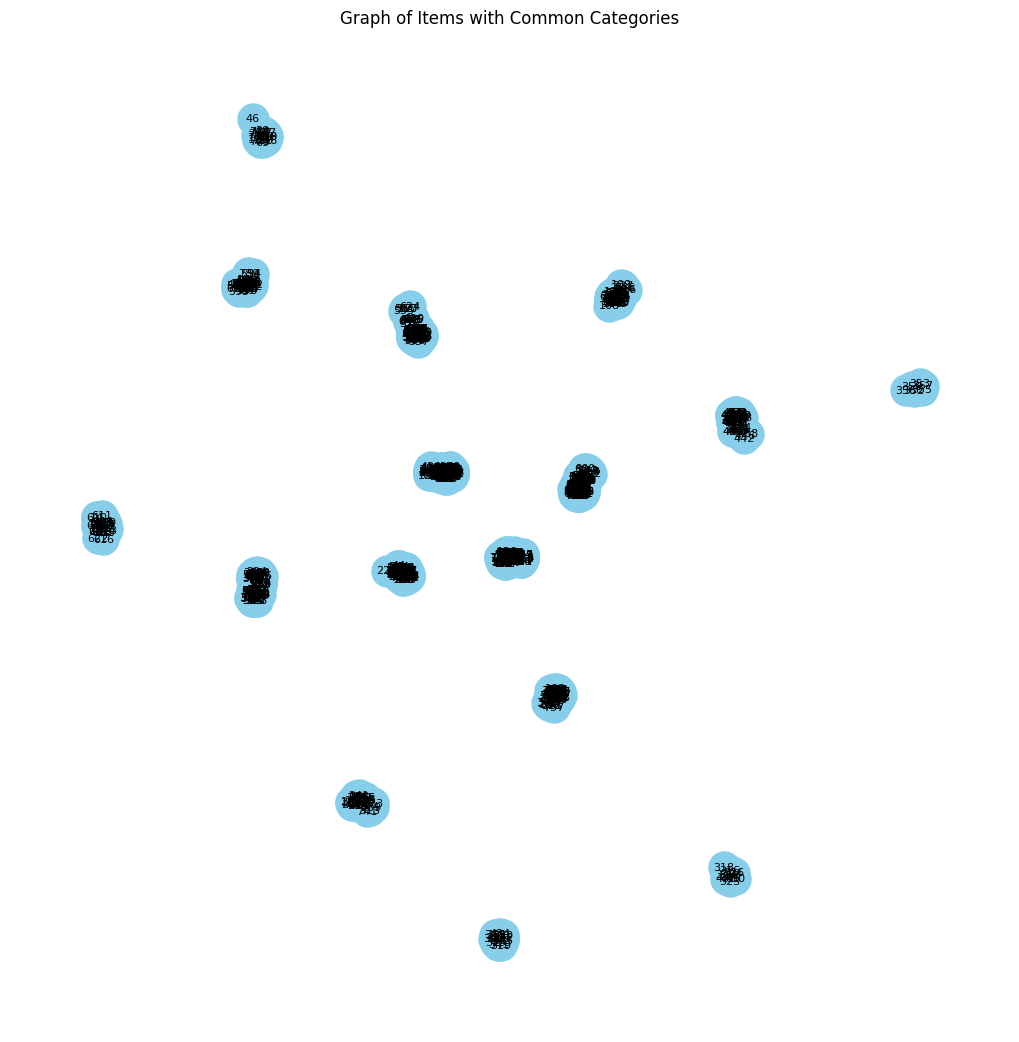

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8)
plt.title('Graph of Items with Common Categories')
plt.show()

In [ ]:
num_nodes = len(G.nodes)
num_edges = len(G.edges)

print("Number of nodes", num_nodes)
print("Number of edges", num_edges)

Number of nodes 799
Number of edges 23519


## DONT

In [ ]:
#X_train, X_test = train_test_split(data, test_size=0.05, shuffle=False)
data[:int(len(data)*0.8)].to_csv('/content/drive/MyDrive/Colab Notebooks/xtrain.csv', index=False)
data[int(len(data)*0.8):].to_csv('/content/drive/MyDrive/Colab Notebooks/xtest.csv', index=False)

X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtrain.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtest.csv')
print(X_train.shape)
print(X_test.shape)

(7484, 23)
(1871, 23)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Randomly split data into 80% training and 20% testing
X_train, X_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=42)

# Save the splits to CSV
X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/xtrain.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/xtest.csv', index=False)

# Load the data back (optional, for verification)
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtrain.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xtest.csv')
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (748, 23)
Testing set shape: (188, 23)


# **Bipartite Graph:Graph recommendation**

0    ['big', 'data', 'analytics', 'business', 'tech...
1                                                  NaN
2    ['integrative', 'healthcarewellbeingpatientcen...
3    ['teach', 'onlineinclusive', 'teachinglanguage...
4    ['lesson', 'planstrategies', 'teachingsocial',...
Name: Skills_processed, dtype: object
Total keywords: 1587
['toolkit', 'discoverydriven', 'learningr', 'embedded', 'ieltslanguage', 'unix', 'analyticsgender', 'space', 'calculationselectronic', 'financial']


100%|██████████| 1587/1587 [00:02<00:00, 781.41it/s]


Total categories: 15 
 ['Data Science' 'Arts and Humanities' 'Health' 'Language Learning'
 'Social Sciences' 'Business' 'Design' 'Personal Development'
 'Computer Science' 'Programming & Development' 'Artificial Intelligence'
 'Science' 'Physical Science and Engineering' 'Information Technology'
 'Cybersecurity']


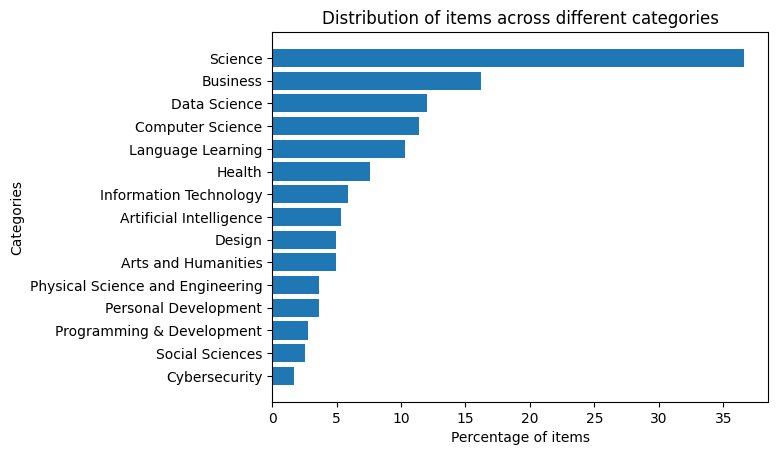

Category Weights: {'Cybersecurity': 1.7379679144385027, 'Social Sciences': 2.5401069518716577, 'Programming & Development': 2.807486631016043, 'Personal Development': 3.6096256684491976, 'Physical Science and Engineering': 3.6096256684491976, 'Arts and Humanities': 4.946524064171124, 'Design': 4.946524064171124, 'Artificial Intelligence': 5.347593582887701, 'Information Technology': 5.88235294117647, 'Health': 7.620320855614973, 'Language Learning': 10.294117647058822, 'Computer Science': 11.363636363636363, 'Data Science': 12.032085561497325, 'Business': 16.176470588235293, 'Science': 36.63101604278075}


In [ ]:
import pandas as pd
from tqdm import tqdm
import re
import ast
import matplotlib.pyplot as plt

# Print the first few entries to check
print(X_train.head()['Skills_processed'])

keywords = set()

# Process keywords from Skills_processed
for i in X_train.Skills_processed:
    if pd.notna(i):
        try:
            keywords.update(ast.literal_eval(str(i)))  # Safely parse the list of keywords
        except (SyntaxError, ValueError) as e:
            print(f"Skipping invalid string: {i}, Error: {e}")

# Convert the set of keywords to a list and print the first few
keywords = list(keywords)
print('Total keywords:', len(keywords))
print(keywords[:10])

# Calculate keyword distribution
dist = []
den = len(X_train)
for i in tqdm(keywords):
    if i == '':  # Skip empty keywords
        continue
    escaped_i = re.escape(i)
    v = len(X_train[X_train.Skills_processed.str.contains(escaped_i, na=False)]) / den * 100
    dist.append((v, i))

dist = pd.DataFrame(dist).sort_values(0)

# Weighting based on distribution
weights_keywords = dict(zip(dist[1], dist[0]))

# Process category distribution
categories = X_train['Category'].dropna().unique()  # Drop NaN values before processing
print('Total categories:', len(categories), '\n', categories)

dist_category = []
for category in categories:
    v = len(X_train[X_train['Category'].str.contains(str(category), na=False)]) / den * 100
    dist_category.append((v, category))

dist_category = pd.DataFrame(dist_category).sort_values(0)

# Assign inverse frequency weights for categories
# dist_category[0] = dist_category[0].apply(lambda x: x**(-1))
weights_category = dict(zip(dist_category[1], dist_category[0]))

# Plotting the distribution of categories
plt.barh(dist_category[1], dist_category[0])
plt.title('Distribution of items across different categories')
plt.xlabel('Percentage of items')
plt.ylabel('Categories')
plt.show()

# Optionally print the final weights
print("Category Weights:", weights_category)


In [ ]:
edges = []
for _, row in X_train.iterrows():
    mid = row.user_id_encoded
    Skills_processed = str(row.Skills_processed)

    try:
        # Process keywords in Skills_processed
        keywords = ast.literal_eval(Skills_processed)
    except (SyntaxError, ValueError) as e:
        print(f"Skipping invalid Skills_processed: {Skills_processed}, Error: {e}")
        continue

    # Add edges for keywords, using weights_keywords (you multiplied by 10 for keywords)
    edges.extend([(mid, k, weights_keywords.get(k, 0) * 10) for k in keywords])

    # Add edges for categories, using weights_category (you multiplied by 200 for categories)
    edges.extend([(mid, g, weights_category.get(g, 0) * 200) for g in categories])

# Convert edges list to DataFrame
data = pd.DataFrame(edges, columns=['userIDS', 'keywords', 'weights'])

# Output shape and preview
print(f"Edges DataFrame shape: {data.shape}")
print(data.head())


Skipping invalid Skills_processed: nan, Error: malformed node or string on line 1: <ast.Name object at 0x78c6a07b27a0>
Skipping invalid Skills_processed: nan, Error: malformed node or string on line 1: <ast.Name object at 0x78c6a0c611b0>
Skipping invalid Skills_processed: nan, Error: malformed node or string on line 1: <ast.Name object at 0x78c6a0c61810>
Skipping invalid Skills_processed: nan, Error: malformed node or string on line 1: <ast.Name object at 0x78c6a0c61450>
Skipping invalid Skills_processed: nan, Error: malformed node or string on line 1: <ast.Name object at 0x78c6a0c60520>
Skipping invalid Skills_processed: nan, Error: malformed node or string on line 1: <ast.Name object at 0x78c6a0c600a0>
Skipping invalid Skills_processed: nan, Error: malformed node or string on line 1: <ast.Name object at 0x78c6a0c635e0>
Skipping invalid Skills_processed: nan, Error: malformed node or string on line 1: <ast.Name object at 0x78c6a0c60100>
Skipping invalid Skills_processed: nan, Error: m

# DONT

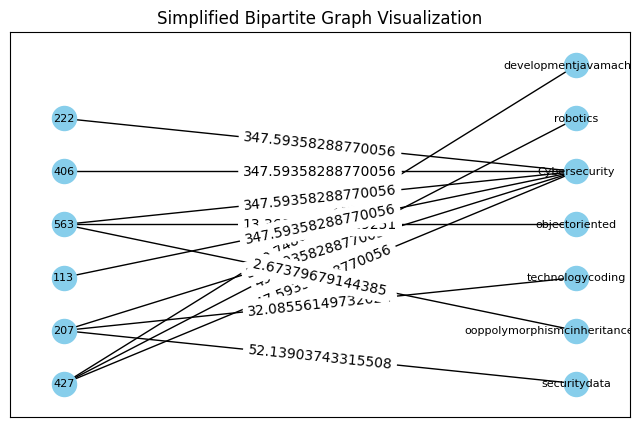

In [ ]:
import pandas as pd
import networkx as nx
import random
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import ast

# Sample a smaller set of users (e.g., 100 users) for demonstration
sampled_users = random.sample(list(X_train.user_id_encoded.unique()), 100)

# Filter the data to only include the sampled users
filtered_data = data[data.userIDS.isin(sampled_users)]

# Construct the bipartite graph with the filtered data
BG = nx.Graph()
BG.add_nodes_from(filtered_data.userIDS.unique(), bipartite=0, label='user')
BG.add_nodes_from(filtered_data.keywords.unique(), bipartite=1, label='skills')
BG.add_weighted_edges_from(filtered_data[['userIDS', 'keywords', 'weights']].values)

# Remove random nodes for better visualization
fraction_to_drop = 0.9  # Reduced fraction to drop
nodes_to_drop = random.sample(list(BG.nodes()), k=int(fraction_to_drop * len(BG.nodes())))
BG.remove_nodes_from(nodes_to_drop)

# Remove small components and isolated nodes
for component in list(nx.connected_components(BG)):
    if len(component) < 2:
        BG.remove_nodes_from(component)

# Split nodes into two sets (users and skills)
l, r = bipartite.sets(BG)
pos = {}
pos.update((node, (1, ind)) for ind, node in enumerate(l))
pos.update((node, (2, ind)) for ind, node in enumerate(r))

# Draw the bipartite graph
fig, ax = plt.subplots(figsize=(8, 5))
nx.draw_networkx(BG, pos=pos, ax=ax, with_labels=True, node_size=300, node_color='skyblue', font_size=8)

# Optional: Display edge weights
labels = nx.get_edge_attributes(BG, 'weight')
nx.draw_networkx_edge_labels(BG, pos=pos, edge_labels=labels)

plt.title('Simplified Bipartite Graph Visualization')
plt.show()


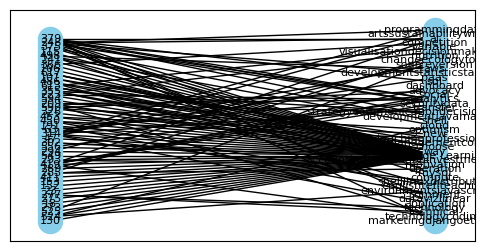

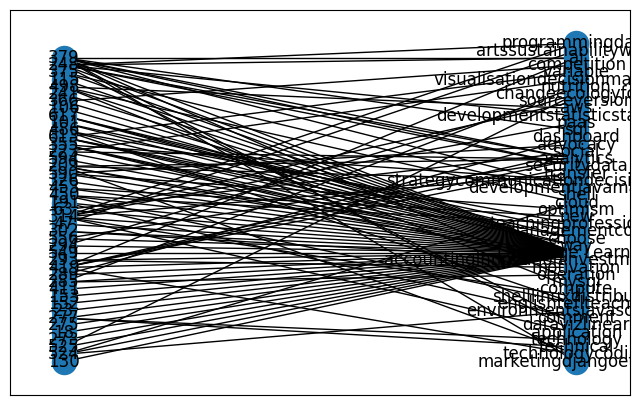

In [ ]:
import networkx as nx
import random

from networkx.algorithms import bipartite


BG = nx.Graph()
BG.add_nodes_from(data.userIDS.unique(), bipartite=0, label='course')
BG.add_nodes_from(data.keywords.unique(), bipartite=1, label='skills')
BG.add_weighted_edges_from(edges)

B = BG
# Randomly drop some nodes for better visualization
fraction_to_drop = 0.9  # Fraction of nodes to drop
nodes_to_drop = random.sample(list(B.nodes()), k=int(fraction_to_drop * len(B.nodes())))
B.remove_nodes_from(nodes_to_drop)

for component in list(nx.connected_components(B)):
    if len(component) < 2:
        B.remove_nodes_from(component)

l,r = bipartite.sets(B)
pos = {}                                                #key=node, value=pos=(x,y)
pos.update((node,(1,ind)) for ind,node in enumerate(l))
pos.update((node,(2,ind)) for ind,node in enumerate(r))

fig,ax = plt.subplots(figsize=(6,3))
nx.draw_networkx(BG, pos=pos, ax=ax, with_labels=True, node_size=300, node_color='skyblue', font_size=8)
plt.show()


fig, ax = plt.subplots(figsize=(8, 5))

# Draw the bipartite graph with custom node and edge attributes
nx.draw_networkx(B, pos=pos, ax=ax, with_labels=True)




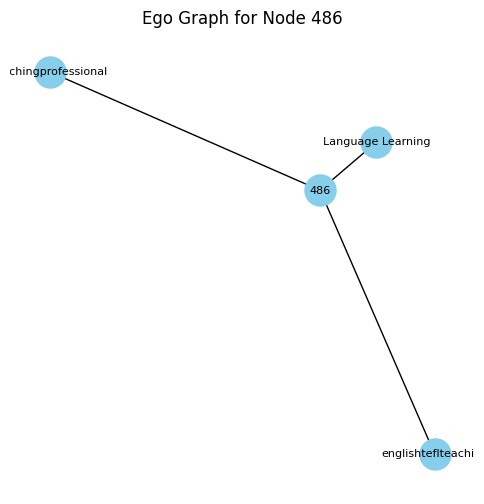

Edge Weights in the Subgraph:
{('englishteflteaching', 486): 76.20320855614973, ('Language Learning', 486): 2058.8235294117644, (486, 'teachingprofessional'): 76.20320855614973}


In [ ]:
sub = nx.ego_graph(B, list(B.nodes())[12])  # Create subgraph around the 15th node in the graph

# Visualize the subgraph
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(sub, with_labels=True, ax=ax, node_size=500, node_color='skyblue', font_size=8)
plt.title('Ego Graph for Node {}'.format(list(B.nodes())[12]))
plt.show()

# Get edge attributes (weights) in the subgraph
edge_weights = nx.get_edge_attributes(sub, 'weight')
print("Edge Weights in the Subgraph:")
print(edge_weights)

In [ ]:
# !pip install stellargraph

ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6.0, <3.8.0; 0.11.0 Requires-Python >=3.6.0, <3.8.0; 0.11.1 Requires-Python >=3.6.0, <3.8.0; 0.4.0 Requires-Python >=3.6,<3.7; 0.4.0b0 Requires-Python >=3.6,<3.7; 0.4.1 Requires-Python >=3.5.0, <3.7.0; 0.5.0 Requires-Python >=3.5.0, <3.7.0; 0.6.0 Requires-Python >=3.5.0, <3.7.0; 0.6.1 Requires-Python >=3.5.0, <3.7.0; 0.7.0 Requires-Python >=3.5.0, <3.8.0; 0.7.1 Requires-Python >=3.5.0, <3.8.0; 0.7.2 Requires-Python >=3.5.0, <3.8.0; 0.7.3 Requires-Python >=3.5.0, <3.8.0; 0.8.0 Requires-Python >=3.5.0, <3.8.0; 0.8.1 Requires-Python >=3.5.0, <3.8.0; 0.8.2 Requires-Python >=3.5.0, <3.8.0; 0.8.3 Requires-Python >=3.5.0, <3.8.0; 0.8.4 Requires-Python >=3.5.0, <3.8.0; 0.9.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0rc1 Requires-Python >=3.6.0, <3.8.0; 1.1.0 Requires-Python >=3.6.0, <3.9.0; 1.2.0 Requires-Python >=3.6.0, <3.9.0; 1.2.1 Requires-Python >=3.

In [ ]:
!python --version
!pip install tensorflow==2.11.0
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

Python 3.10.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 39.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: keras
    Found existing ins

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-eh3_4vfm
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-eh3_4vfm
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431845 sha256=e18dd13e4e86b8646f3ff18d92e84774cfbba085216d41313d1f8f767a9cc105
  Stored in directory: /tmp/pip-ephem-wheel-cache-4gn3b1yl/wheels/f3/06/0f/089f69af27d308a1830638f855b6c5755311d8ffc451de9980
Successfully built stellargraph


# DONT DONT

# !pip install stellargraph

import pickle
import numpy as np
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from sklearn.feature_extraction.text import CountVectorizer

# # Load the bipartite graph
B = pickle.load(open(path_+'graph.pkl', 'rb'))

def item_recommend(item_id):
    # Initialize BiasedRandomWalk
    rw = BiasedRandomWalk(StellarGraph(B))
    walk = rw.run(nodes=[item_id], n=1, length=10000, p=0.01, q=100, weighted=True, seed=42)

    # Processing the walk
    walk = list(filter(lambda x: isinstance(x, int), walk[0])) # Assuming product IDs are integers
    walk = list(map(str, walk)) # Convert product IDs to strings for vectorization
    walk_str = ' '.join(walk) # Create a space-separated string of product IDs

    # Create a vocabulary from your dataset's product IDs
    product_ids = sorted(list(set(your_dataset['itemName']))) # Replace 'your_dataset' with the name of your dataset variable
    vocab = {str(prod_id): index for index, prod_id in enumerate(product_ids)}

    # Vectorize the walk
    vec = CountVectorizer(vocabulary=vocab)
    embed = vec.fit_transform([walk_str])

    # Recommendation generation
    reverse_vocab = {v: int(k) for k, v in vocab.items()}
    embed = np.array(embed.todense())[0]

    top5_ids = []
    for index in embed.argsort()[::-1]:
        if len(top5_ids) == 5:
            break
        prod_id = reverse_vocab[index]
        if prod_id != item_id: # Ensure the recommended item is not the query item
            top5_ids.append(prod_id)

    return top5_ids

print(item_recommend(407))

Number of nodes: 3806
Number of edges: 4879


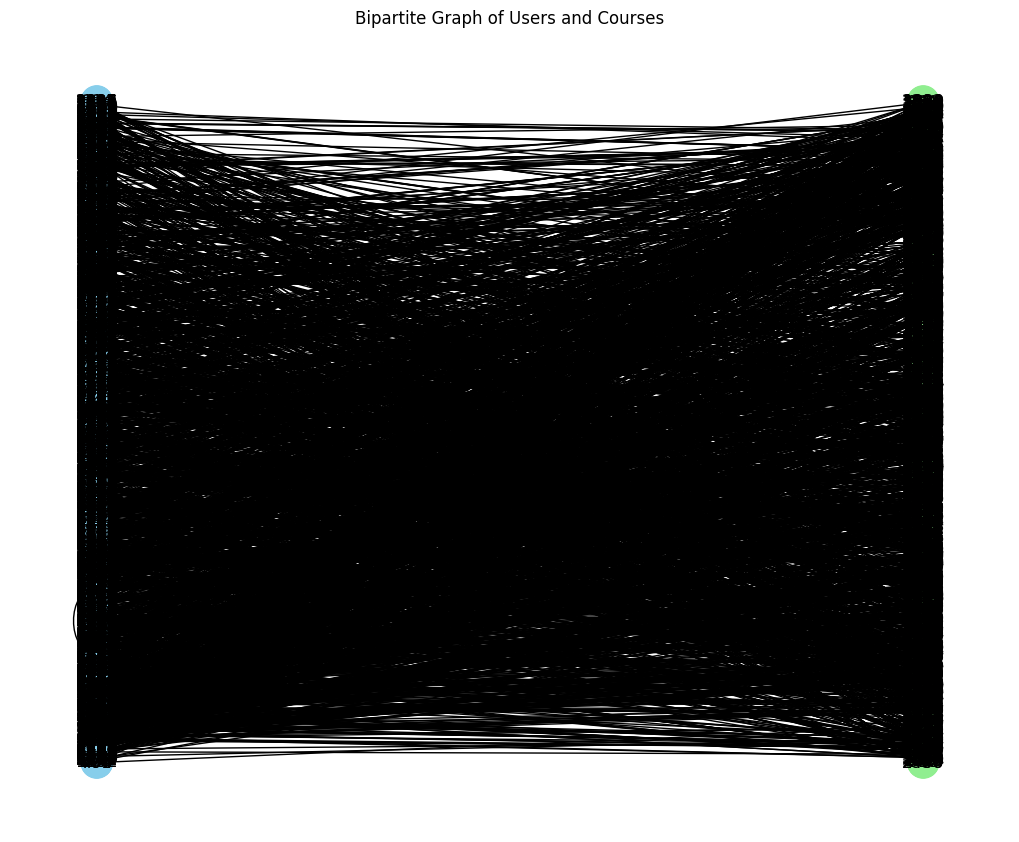

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already loaded
df = merged_df

# Encode userName and itemName
df['user_id'] = df['user_id'].astype('category').cat.codes
df['course_id'] = df['course_id'].astype('category').cat.codes

# Filter for favorable reviews
favorable_reviews_df = df[df['rating'] >= 3.5]

# Create an empty graph
G = nx.Graph()

# Add nodes with the node attribute "bipartite"
G.add_nodes_from(df['course_id'], bipartite=0)  # Products (courses)
G.add_nodes_from(favorable_reviews_df['user_id'], bipartite=1)  # Users

# Add edges between users and products (courses) based on favorable reviews
for _, row in favorable_reviews_df.iterrows():
    G.add_edge(row['user_id'], row['course_id'])

# Example: Print the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# For visualization (requires matplotlib)
# List all nodes for both sets in the bipartite graph
course_nodes = favorable_reviews_df['course_id'].unique()
user_nodes = favorable_reviews_df['user_id'].unique()

# Set positions using bipartite layout
pos = nx.bipartite_layout(G, nodes=course_nodes)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color=['skyblue' if n in course_nodes else 'lightgreen' for n in G], node_size=500)
plt.title("Bipartite Graph of Users and Courses")
plt.show()


Number of nodes: 3806
Number of edges: 4879


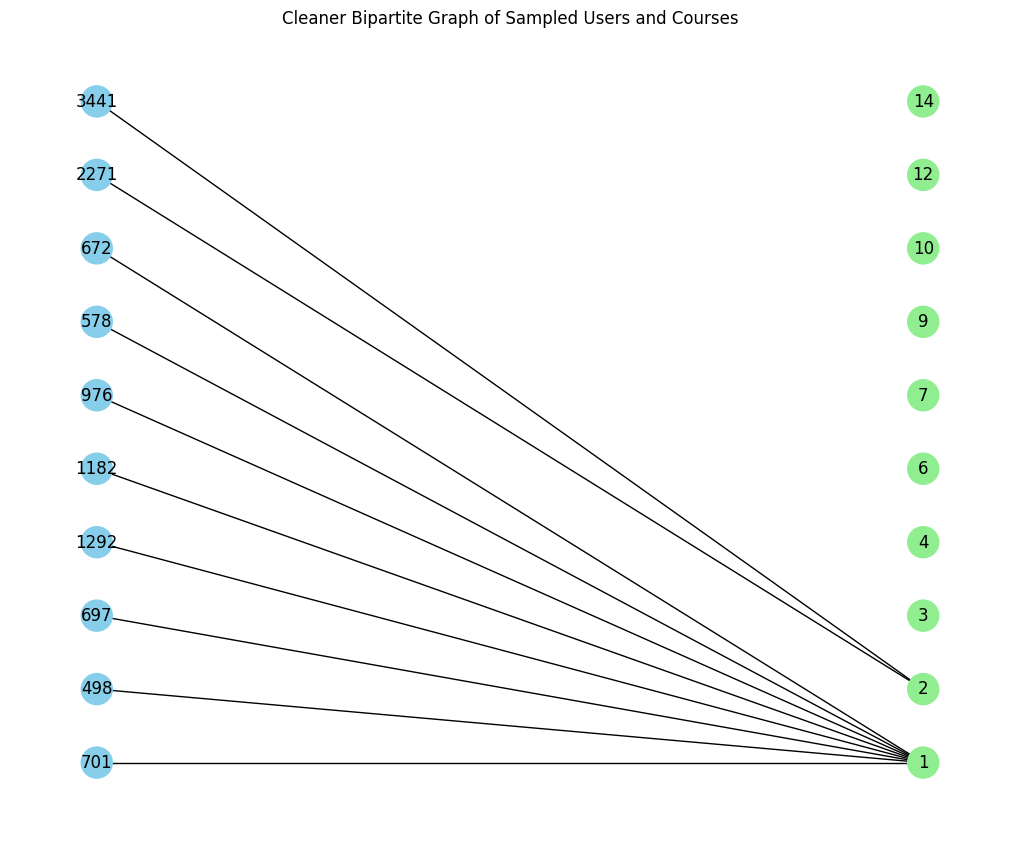

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = merged_df

df['user_id'] = df['user_id'].astype('category').cat.codes
df['course_id'] = df['course_id'].astype('category').cat.codes

# Filter for favorable reviews
favorable_reviews_df = df[df['rating'] >= 3.5]

# Create an empty graph
G = nx.Graph()

# Add nodes with the node attribute "bipartite"
G.add_nodes_from(df['course_id'], bipartite=0)  # Products (courses)
G.add_nodes_from(favorable_reviews_df['user_id'], bipartite=1)  # Users

# Add edges between users and products (courses) based on favorable reviews
for _, row in favorable_reviews_df.iterrows():
    G.add_edge(row['user_id'], row['course_id'])

# Example: Print the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Sample a subset of users and courses for a cleaner graph
sampled_users = favorable_reviews_df['user_id'].unique()[:10]  # Sample the first 10 users
sampled_courses = favorable_reviews_df['course_id'].unique()[:10]  # Sample the first 10 courses

# Create a subgraph with the sampled nodes
subgraph_nodes = list(sampled_users) + list(sampled_courses)
subgraph = G.subgraph(subgraph_nodes)

# Set positions using bipartite layout
pos = nx.bipartite_layout(subgraph, nodes=sampled_courses)

# Draw the subgraph
plt.figure(figsize=(10, 8))
node_color = ['skyblue' if n in sampled_courses else 'lightgreen' for n in subgraph.nodes()]
nx.draw(subgraph, pos, with_labels=True, node_color=node_color, node_size=500)
plt.title("Cleaner Bipartite Graph of Sampled Users and Courses")
plt.show()


In [ ]:
df.columns

Index(['user_id', 'course_id', 'rating', 'language', 'preferred_instructor',
       'Title', 'Short_Intro', 'Category', 'Sub-Category', 'Course_Type',
       'Language', 'Skills', 'Instructors', 'Site'],
      dtype='object')

In [ ]:
!pip uninstall community
!pip uninstall python-louvain

!pip install python-louvain


Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.10/dist-packages/community/community_status.py
Proceed (Y/n)? n
Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Would remove:
    /usr/local/bin/community
    /usr/local/lib/python3.10/dist-packages/community/*
    /usr/local/lib/python3.10/dist-packages/python_louvain-0.16.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/community/app.py
Proceed (Y/n)? n


Community 1: {509, 3591, 264, 2314, 1036, 1550, 273, 786, 791, 3611, 806, 2342, 1320, 553, 1831, 1319, 2854, 2607, 817, 3634, 50, 1079, 2107, 318, 831, 68, 2632, 587, 335, 1620, 84, 1112, 600, 3674, 860, 863, 866, 611, 2147, 2149, 3686, 615, 2664, 2921, 2157, 116, 2676, 120, 633, 2175, 3712, 132, 646, 2951, 2186, 651, 141, 143, 1939, 150, 2967, 1947, 412, 2974, 2980, 1960, 2989, 1712, 2993, 2229, 3782, 199, 2247, 1480, 1229, 2260, 471, 999, 744, 3561, 1519, 1781, 1533}
Community 2: {1018, 1540, 517, 3079, 2568, 511, 2060, 3601, 1553, 3603, 2067, 1556, 2581, 536, 541, 2078, 542, 2593, 2595, 2043, 1578, 2094, 1072, 1586, 2610, 3124, 2613, 3638, 1596, 61, 2622, 574, 3132, 2626, 2115, 2116, 3141, 585, 2128, 2129, 3152, 3157, 2133, 3160, 2137, 1627, 2140, 3166, 2145, 100, 618, 3179, 110, 1134, 114, 2164, 3189, 630, 2167, 3191, 3196, 124, 2174, 127, 2178, 3205, 2694, 1671, 1161, 3210, 3211, 2189, 142, 2190, 2192, 2193, 2705, 2704, 3217, 2197, 2710, 3225, 3226, 666, 3230, 2207, 2208, 1695, 27

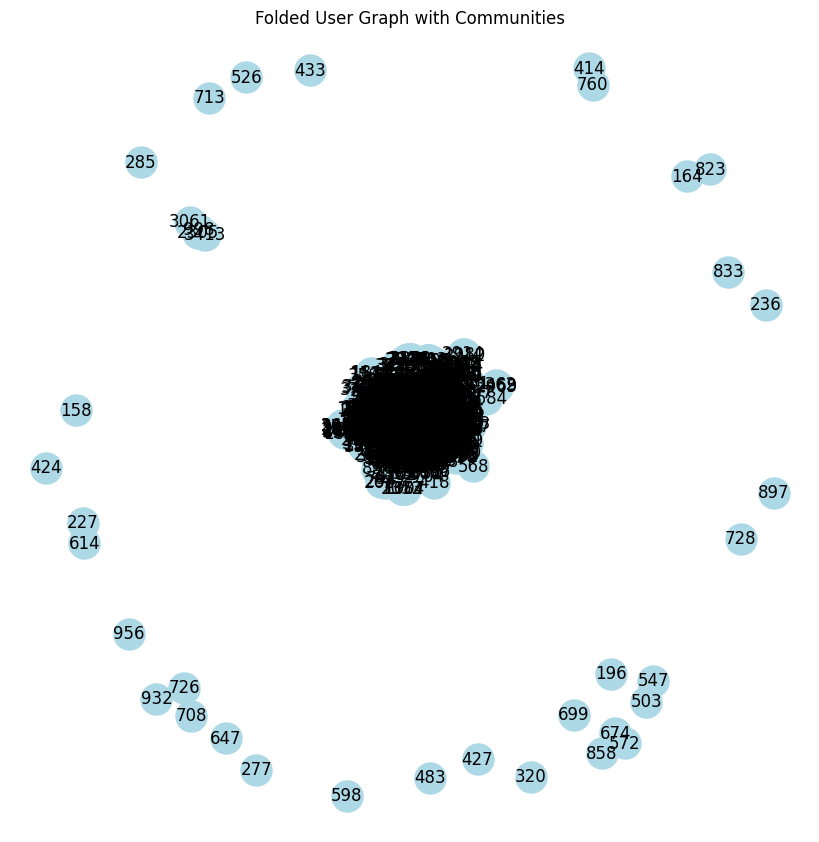

In [ ]:
from networkx.algorithms import bipartite
from networkx.algorithms.community import greedy_modularity_communities
import itertools
# Adjust the threshold T if necessary
T = 0  # Example: lower threshold

# Create a weighted projected graph (folded graph) for users
user_nodes = set(n for n, d in G.nodes(data=True) if d['bipartite'] == 1)
user_folded_graph = bipartite.weighted_projected_graph(G, user_nodes)

# Filter edges where co-reviews are less than the threshold T
edges_to_remove = [(u, v) for u, v, d in user_folded_graph.edges(data=True) if d['weight'] < T]
user_folded_graph.remove_edges_from(edges_to_remove)

# Ensure the graph is not empty
if user_folded_graph.number_of_edges() == 0:
    print("The folded graph has no edges. Adjust the threshold T.")
else:
    # Step 2: Community Detection with Louvain Algorithm
    # communities = greedy_modularity_communities(user_folded_graph)
    communities = nx.community.louvain_communities(user_folded_graph, seed=123)

    # Display the communities
    for i, community in enumerate(communities):
        print(f"Community {i+1}: {community}")

    # Visualize the folded graph (optional)
    pos = nx.spring_layout(user_folded_graph)  # Use spring layout for better visualization
    plt.figure(figsize=(8, 8))
    nx.draw(user_folded_graph, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
    plt.title("Folded User Graph with Communities")
    plt.show()

In [ ]:
max(communities)

{50,
 68,
 84,
 116,
 120,
 132,
 141,
 143,
 150,
 199,
 264,
 273,
 318,
 335,
 412,
 471,
 509,
 553,
 587,
 600,
 611,
 615,
 633,
 646,
 651,
 744,
 786,
 791,
 806,
 817,
 831,
 860,
 863,
 866,
 999,
 1036,
 1079,
 1112,
 1229,
 1319,
 1320,
 1480,
 1519,
 1533,
 1550,
 1620,
 1712,
 1781,
 1831,
 1939,
 1947,
 1960,
 2107,
 2147,
 2149,
 2157,
 2175,
 2186,
 2229,
 2247,
 2260,
 2314,
 2342,
 2607,
 2632,
 2664,
 2676,
 2854,
 2921,
 2951,
 2967,
 2974,
 2980,
 2989,
 2993,
 3561,
 3591,
 3611,
 3634,
 3674,
 3686,
 3712,
 3782}

In [ ]:
print(type(communities))
print(communities)
print(sum(len(s) == 1 for s in communities))

<class 'list'>
[{509, 3591, 264, 2314, 1036, 1550, 273, 786, 791, 3611, 806, 2342, 1320, 553, 1831, 1319, 2854, 2607, 817, 3634, 50, 1079, 2107, 318, 831, 68, 2632, 587, 335, 1620, 84, 1112, 600, 3674, 860, 863, 866, 611, 2147, 2149, 3686, 615, 2664, 2921, 2157, 116, 2676, 120, 633, 2175, 3712, 132, 646, 2951, 2186, 651, 141, 143, 1939, 150, 2967, 1947, 412, 2974, 2980, 1960, 2989, 1712, 2993, 2229, 3782, 199, 2247, 1480, 1229, 2260, 471, 999, 744, 3561, 1519, 1781, 1533}, {1018, 1540, 517, 3079, 2568, 511, 2060, 3601, 1553, 3603, 2067, 1556, 2581, 536, 541, 2078, 542, 2593, 2595, 2043, 1578, 2094, 1072, 1586, 2610, 3124, 2613, 3638, 1596, 61, 2622, 574, 3132, 2626, 2115, 2116, 3141, 585, 2128, 2129, 3152, 3157, 2133, 3160, 2137, 1627, 2140, 3166, 2145, 100, 618, 3179, 110, 1134, 114, 2164, 3189, 630, 2167, 3191, 3196, 124, 2174, 127, 2178, 3205, 2694, 1671, 1161, 3210, 3211, 2189, 142, 2190, 2192, 2193, 2705, 2704, 3217, 2197, 2710, 3225, 3226, 666, 3230, 2207, 2208, 1695, 2722, 1699,

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.model_selection import ParameterGrid
import math

# Convert communities to a format that's easier to work with
community_dict = {}
for i, community in enumerate(communities):
    for user in community:
        community_dict[user] = i

# Compute degree centrality for the products
product_nodes = set(n for n, d in G.nodes(data=True) if d['bipartite'] == 0)
centrality = nx.degree_centrality(G)
product_centrality = {node: centrality[node] for node in product_nodes}
print(product_centrality)
# Now product_centrality[node] gives the hubbiness of each product node
# Define a function to find similar users based on community
def find_similar_users(user_id):
    # print(user_id)
    if user_id in community_dict:
        user_community = community_dict[user_id]
        similar_users = [user for user, community in community_dict.items() if community == user_community and user != user_id]
        if similar_users:
            similar_users.append(user_id)
        return similar_users
    else:
        # Handle the case where user_id is not in community_dict
        print(f"User {user_id} not found in any community.")
        return [] # or raise an exception, or return a default value

    # user_community = community_dict[user_id]
    # similar_users = [user for user, community in community_dict.items() if community == user_community and user != user_id]
    # if similar_users:
    #   similar_users.append(user_id)
    # return similar_users

# Define Pu as the set of all products that user u has bought and given a rating ≥ 3.5
def find_user_products(user_id, graph):
    # return df[(reviews_df['user_id'] == user_id) & (reviews_df['rating'] >= 3.5)]['product_id'].tolist()
    return list(graph.neighbors(user_id))

# Create the Refined Set
def create_refined_set(user_id, similar_users, graph):
    user_products = set(find_user_products(user_id, graph))
    refined_set = set()
    for u in similar_users:
        if u != user_id:
            refined_set.update(find_user_products(u, graph))
    return refined_set

# Calculate Product Scores
def calculate_product_scores(refined_set, w1, w2, w3):
    product_scores = {}
    for course_id in refined_set:
        reviews = df[df['course_id'] == course_id]
        f = len(reviews)
        hu = 0
        try:
          hu = product_centrality[course_id]
        except:
          pass
        score = 0
        for _, review in reviews.iterrows():
            h = review['preferred_instructor']
            Pr = review['rating']
            score += h * Pr
        score = w1 * (1/f) * score + w2 * math.log(f) + w3 * hu
        product_scores[course_id] = score
    return product_scores

# Recommend Products
def recommend_products(user_id, recSetSize, w1, w2, w3, graph):
    similar_users = find_similar_users(user_id)
    # print(similar_users)
    refined_set = create_refined_set(user_id, similar_users, graph)
    # print(refined_set)
    product_scores = calculate_product_scores(refined_set, w1, w2, w3)
    #print(product_scores)
    recommended_products = sorted(product_scores, key=product_scores.get, reverse=True)[:recSetSize]
    return recommended_products

# Example usage
user_id = 6  # Example user ID
recSetSize = 5  # Number of products to recommend
w1, w2, w3 = 20, 20, 100  # Example weights
recommended_products = recommend_products(user_id, recSetSize, w1, w2, w3, G)
print(recommended_products)

{0: 0.0, 5: 0.00026281208935611036, 8: 0.00026281208935611036, 11: 0.0010512483574244415, 13: 0.0007884362680683311, 24: 0.0005256241787122207, 27: 0.00026281208935611036, 33: 0.0, 36: 0.0, 37: 0.0, 39: 0.0005256241787122207, 41: 0.0005256241787122207, 43: 0.00026281208935611036, 45: 0.0, 47: 0.00026281208935611036, 50: 0.0005256241787122207, 52: 0.0, 54: 0.0005256241787122207, 57: 0.00026281208935611036, 63: 0.0005256241787122207, 64: 0.0, 65: 0.0, 66: 0.0, 71: 0.00026281208935611036, 73: 0.0, 74: 0.00026281208935611036, 76: 0.0, 77: 0.0005256241787122207, 79: 0.0, 80: 0.0, 84: 0.00026281208935611036, 87: 0.0, 89: 0.0, 90: 0.0, 91: 0.00026281208935611036, 92: 0.0, 94: 0.0005256241787122207, 95: 0.0, 96: 0.0, 99: 0.0, 102: 0.0, 104: 0.0, 106: 0.0, 107: 0.00026281208935611036, 111: 0.0005256241787122207, 113: 0.0, 133: 0.0, 141: 0.002102496714848883, 144: 0.0, 146: 0.0, 147: 0.00026281208935611036, 155: 0.0, 157: 0.0, 167: 0.0, 174: 0.00026281208935611036, 175: 0.0, 176: 0.0, 178: 0.000

In [ ]:
import pandas as pd
import networkx as nx
import math
from collections import defaultdict

# Assuming df contains the following columns: 'user_id', 'course_id', 'rating', 'category', 'preferred_instructor'

# Step 1: Create a function to get courses rated highly by users in the same community
def find_similar_users_in_community(user_id, communities):
    # Find the community of the user
    user_community = next((community for community in communities if user_id in community), None)
    if user_community:
        similar_users = user_community - {user_id}  # Exclude the user themselves
        return similar_users
    return []

# Step 2: Find courses rated by a user with a rating >= 3.5
def find_user_courses(user_id, df):
    return df[df['user_id'] == user_id][df['rating'] >= 3.5]['course_id'].tolist()

# Step 3: Refined set of courses (based on similar users' ratings within the same community)
def create_refined_set(user_id, similar_users, df):
    user_courses = set(find_user_courses(user_id, df))
    refined_set = set(user_courses)
    for u in similar_users:
        refined_set.update(find_user_courses(u, df))
    return refined_set

# Step 4: Calculate course scores (using ratings, popularity, and community)
def calculate_course_scores(refined_set, df, course_centrality, w1, w2, w3):
    course_scores = {}
    for course_id in refined_set:
        reviews = df[df['course_id'] == course_id]
        f = len(reviews)  # Number of reviews for the course
        hu = course_centrality.get(course_id, 0)  # Degree centrality of the course
        score = 0
        for _, review in reviews.iterrows():
            Pr = review['rating']  # Rating given by a user
            score += Pr  # Summing up ratings for the course
        # Weighted score combining: ratings, popularity, and centrality
        score = w1 * (1/f) * score + w2 * math.log(f) + w3 * hu
        course_scores[course_id] = score
    return course_scores

# Step 5: Generate Recommendations for a given user
def recommend_courses(user_id, communities, df, course_centrality, recSetSize, w1, w2, w3):
    similar_users = find_similar_users_in_community(user_id, communities)
    refined_set = create_refined_set(user_id, similar_users, df)
    course_scores = calculate_course_scores(refined_set, df, course_centrality, w1, w2, w3)
    recommended_courses = sorted(course_scores, key=course_scores.get, reverse=True)[:recSetSize]
    return recommended_courses

# Example Usage
# Assume you already have the course_centrality from the graph (degree centrality)
course_centrality = {course: centrality_value for course, centrality_value in zip(range(5000), [0.5]*5000)}  # Example placeholder

user_id = 6  # Example user ID
recSetSize = 5  # Number of courses to recommend
w1, w2, w3 = 1, 1, 100  # Example weights

# Example community from Louvain
# communities = [[user1, user2, user3], [user4, user5, user6]]  # Example user communities

recommended_courses = recommend_courses(user_id, communities, df, course_centrality, recSetSize, w1, w2, w3)
print("Recommended Courses:", recommended_courses)


<ipython-input-35-197e1de24caf>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['user_id'] == user_id][df['rating'] >= 3.5]['course_id'].tolist()
<ipython-input-35-197e1de24caf>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['user_id'] == user_id][df['rating'] >= 3.5]['course_id'].tolist()
<ipython-input-35-197e1de24caf>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['user_id'] == user_id][df['rating'] >= 3.5]['course_id'].tolist()
<ipython-input-35-197e1de24caf>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['user_id'] == user_id][df['rating'] >= 3.5]['course_id'].tolist()
<ipython-input-35-197e1de24caf>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['user_id'] == user_id][df['rating'] >= 3.5]['course_id'].tolist()
<ipython-input-35-197e1de24caf>:19:

Recommended Courses: [3182, 2766, 3185, 3237, 3305]


In [ ]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the edges into train, validation, and test sets (80%, 10%, 10%)
edges = [(u, v) for u, v in G.edges()]
train_edges, temp_edges = train_test_split(edges, test_size=0.2, random_state=42)
val_edges, test_edges = train_test_split(temp_edges, test_size=0.5, random_state=42)

# Placeholder for your actual recommendation function
def get_recommendations(user_name, w1, w2, w3, graph):
    try:
      return recommend_products(user_name, 5, w1, w2, w3, graph)
    except:
      pass


# Define a function to evaluate your recommendation system
def evaluate_recommendations(recommended_products, actual_edges):
  if(recommended_products.items()):
    y_true = [1 if (user, item) in actual_edges else 0 for user, items in recommended_products.items() if (items) for item in items]
    y_pred = [1 for _ in y_true]  # Assuming all recommendations are positive predictions
    precision = precision_score(y_true, y_pred, average='micro')
    print(precision)
    recall = recall_score(y_true, y_pred, average='micro')
    print(recall)
    f1 = f1_score(y_true, y_pred, average='micro')
    print(f1)
    return precision, recall, f1
  return 0

# Define a grid search function to find the best hyperparameters
def grid_search(train_graph, validation_edges, w1_range, w2_range, w3_range):
    best_f1 = -1
    best_weights = None

    # Iterate over all combinations in the grid
    for w1, w2, w3 in itertools.product(w1_range, w2_range, w3_range):
        # Generate recommendations for each user in the validation set
        recommendations = {user: get_recommendations(user, w1, w2, w3, train_graph) for user, _ in validation_edges}

        # Evaluate the recommendations
        _, _, f1 = evaluate_recommendations(recommendations, validation_edges)

        # If the new F1 score is better than the best found so far, update best score and weights
        if f1 > best_f1:
            best_f1 = f1
            best_weights = (w1, w2, w3)

    return best_weights, best_f1

# Define the range for your weights
w1_range = range(0, 20, 5)
w2_range = range(0, 20, 5)
w3_range = range(0, 100 , 50)

# Perform the grid search
G_train = nx.Graph()

G_train.add_nodes_from(G.nodes())
# Add only the train_edges to G_train
G_train.add_edges_from(train_edges)
# Verify if G_train is bipartite
is_bipartite = nx.is_bipartite(G_train)
G_train, is_bipartite
print([user for user, _ in test_edges] - G_train.nodes)
best_weights, best_score = grid_search(G_train, val_edges, w1_range, w2_range, w3_range)
print(f"Best Weights: {best_weights}")
print(f"Best F1 Score on Validation Set: {best_score}")

# # Finally, evaluate performance on the test set with the best weights
test_recommendations = {user: get_recommendations(user, *best_weights, G) for user, _ in test_edges}
_, _, test_f1 = evaluate_recommendations(test_recommendations, test_edges)
print(f"F1 Score on Test Set: {test_f1}")


set()
User 2144 not found in any community.
User 2803 not found in any community.
User 3155 not found in any community.
User 2757 not found in any community.
User 2735 not found in any community.
User 2285 not found in any community.
User 2230 not found in any community.
User 2225 not found in any community.
User 2748 not found in any community.
User 3261 not found in any community.
User 3167 not found in any community.
User 2161 not found in any community.
User 3001 not found in any community.
User 1782 not found in any community.
User 2214 not found in any community.
User 3451 not found in any community.
User 2762 not found in any community.
User 2711 not found in any community.
User 2748 not found in any community.
User 2861 not found in any community.
User 2161 not found in any community.
User 1626 not found in any community.
User 2683 not found in any community.
User 2572 not found in any community.
User 2163 not found in any community.
User 2869 not found in any community.
User 2